In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Basic Data Exploration

In [2]:
df=pd.read_excel("EDA Cars-1.xlsx")

In [3]:
df=pd.DataFrame(df)

In [4]:
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0


In [5]:
#objective is which type of person prefers which type of car
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDEX           303 non-null    int64  
 1   INCOME          260 non-null    float64
 2   MARITAL STATUS  275 non-null    object 
 3   SEX             297 non-null    object 
 4   EDUCATION       259 non-null    object 
 5   JOB             257 non-null    object 
 6   TRAVEL TIME     262 non-null    float64
 7   USE             250 non-null    object 
 8   MILES CLOCKED   278 non-null    float64
 9   CAR TYPE        293 non-null    object 
 10  CAR AGE         283 non-null    float64
 11  CITY            297 non-null    object 
 12  POSTAL CODE     300 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 30.9+ KB


In [6]:
df.describe(include="all")

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
count,303.000000,260.000000,275,297,259,257,262.000000,250,278.000000,293,283.000000,297,300.000000
unique,NaN,NaN,2,2,4,8,NaN,2,NaN,6,NaN,11,NaN
top,NaN,NaN,No,F,High School,Blue Collar,NaN,Private,NaN,SUV,NaN,Houston,NaN
freq,NaN,NaN,151,165,161,96,NaN,133,NaN,93,NaN,39,NaN
mean,139.640264,50025.162170,NaN,NaN,NaN,NaN,34.282098,NaN,13591.978417,NaN,6.265018,NaN,50712.196667
std,85.178422,41186.807914,NaN,NaN,NaN,NaN,14.910178,NaN,7167.328655,NaN,5.111218,NaN,24141.029290
min,1.000000,0.000000,NaN,NaN,NaN,NaN,5.000000,NaN,1500.000000,NaN,1.000000,NaN,11435.000000
25%,62.500000,20452.885023,NaN,NaN,NaN,NaN,24.449874,NaN,7900.000000,NaN,1.000000,NaN,42420.000000
50%,138.000000,44571.590870,NaN,NaN,NaN,NaN,33.564757,NaN,12065.000000,NaN,6.000000,NaN,47150.000000
75%,213.500000,66485.761387,NaN,NaN,NaN,NaN,43.907339,NaN,18240.000000,NaN,10.000000,NaN,61701.000000


In [7]:
# only seeing describe you can get some insights, & can make some statetements &
#judge them by usingsome other info or something etc for help
# postal code is kk to be in int type , so we can change the datatype

## Checking for duplicates & dropping them

In [8]:
#Duplicates
df[df.duplicated()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
69,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
70,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
71,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
72,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
73,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
74,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
75,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
76,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
77,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
78,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0


In [9]:
# if we want to make the model to work in real time, duplicates must not be there
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

## Checking whether to drop missing values

In [11]:
df.shape

(289, 13)

In [12]:
df.dropna().shape #don't drop the missing values as we get less data

(94, 13)

In [13]:
df.isnull().sum()
# need to manage this missing values, can't drop them

INDEX              0
INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE          10
CAR AGE           20
CITY               6
POSTAL CODE        3
dtype: int64

## Filling the missing values

In [14]:
#numerical:Mean and Median
# Categorical:mode

## Filling the POSTAL CODE missing values

In [15]:
# less null value col , see them to observe something
# first dealing with postal code & city as both are related & have less null values.
df[df['POSTAL CODE'].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
7,8,NaN,Yes,F,High School,Blue Collar,15.665947,NaN,11290.0,Sports Car,1.0,Texas,NaN
16,17,NaN,No,F,High School,Blue Collar,42.500815,Private,NaN,SUV,4.0,Texas,NaN
299,286,18408.39545,No,M,High School,Clerical,42.619118,Private,7440.0,NaN,1.0,Las Vegas,NaN


In [16]:
df[df['CITY'].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
11,12,NaN,No,F,High School,Blue Collar,61.603208,Commercial,9360.0,Sports Car,NaN,NaN,42420.0
19,20,40656.44899,Yes,F,High School,NaN,57.091375,Private,9170.0,Sports Car,7.0,NaN,42420.0
225,212,81766.51691,No,M,High School,Blue Collar,30.468715,Commercial,15570.0,SUV,7.0,NaN,44123.0
254,241,204667.58970,Yes,F,Masters,NaN,31.515561,Commercial,21970.0,Van,NaN,NaN,11435.0
285,272,0.00000,Yes,F,Bachelors,Student,50.484397,Private,9270.0,SUV,10.0,NaN,44412.0
292,279,69475.68892,Yes,F,High School,Blue Collar,43.727279,Private,12750.0,SUV,6.0,NaN,44412.0


In [17]:
# can we add mode of city is houston to all the missing values. YES , we can add because there are less missing values & 
# it won't create much false data. so lets see the mode
df['CITY'].mode()
# so the city can be bi-modal, this is the case when there is no logical approach, but postal code information is there
# but cities have unique postal codes, so first fill the postal codes & then cities can be filled based on postalcode

0      Houston
1    Las Vegas
Name: CITY, dtype: object

In [18]:
# for postal code , it's not correct to fill the mode .
# Because logically every city has its own pincode all the missing pincodes has its city
df.groupby(['CITY','POSTAL CODE']).size()

CITY           POSTAL CODE
Columbia       44123.0        28
Houston        61701.0        39
Las Vegas      44412.0        38
Los Angeles    90049.0        19
New Albany     47150.0        17
New York City  12180.0        23
Philadelphia   84057.0         1
San Francisco  55106.0        27
Seattle        78207.0        36
Texas          42420.0        20
Washington     11435.0        32
dtype: int64

In [19]:
# Fill the missing postalcode
df[df['POSTAL CODE'].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
7,8,NaN,Yes,F,High School,Blue Collar,15.665947,NaN,11290.0,Sports Car,1.0,Texas,NaN
16,17,NaN,No,F,High School,Blue Collar,42.500815,Private,NaN,SUV,4.0,Texas,NaN
299,286,18408.39545,No,M,High School,Clerical,42.619118,Private,7440.0,NaN,1.0,Las Vegas,NaN


In [20]:
# manual approach of filling
df.loc[[7,16,299],'POSTAL CODE']=[42420,42420,44412]
# we can make a dict of postal codes of cities , if we need to fill more missing values to fill the postal codes using loop
df[df['POSTAL CODE'].isnull()]
# atlast we have no missing postal codes

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


## Filling the CITY missing values

In [21]:
#a dict of postal codes of cities, making postal code as key to fill the missing cities, 
postal_city_mapping={
    '44123.0': 'Columbia',
    '61701.0': 'Houston',
    '44412.0': 'Las Vegas',
    '90049.0': 'Los Angeles',
    '47150.0': 'New Albany',
    '12180.0': 'New York City',
    '84057.0': 'Philadelphia',
    '55106.0': 'San Francisco',
    '78207.0': 'Seattle',
    '11435.0': 'Washington',
    '42420.0': 'Texas'
}



In [22]:
ps=list(map(lambda x:postal_city_mapping.get(str(x)),list(df[df['CITY'].isnull()]['POSTAL CODE'].values)))
j=df[df['CITY'].isnull()].index
k=0
for i in range(df['CITY'].isnull().sum()):
        df.loc[j[k],'CITY']=ps[i]
        k+=1
        

In [23]:
df[df['CITY'].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


In [24]:
# anoher method to fill, not to make to much lenghty
df['CITY'].fillna(df['POSTAL CODE'].astype(str).map(postal_city_mapping))


0          Texas
1          Texas
2          Texas
3          Texas
4          Texas
         ...    
298    Las Vegas
299    Las Vegas
300    Las Vegas
301    Las Vegas
302    Las Vegas
Name: CITY, Length: 289, dtype: object

The code `df['POSTAL CODE'].astype(str).map(postal_city_mapping)` is performing the following operations:

1. `df['POSTAL CODE']`: It selects the 'POSTAL CODE' column from the DataFrame `df`.

2. `.astype(str)`: It converts the values in the 'POSTAL CODE' column to strings. This is done to ensure that the keys in the `postal_city_mapping` dictionary are of the same data type as the values in the 'POSTAL CODE' column. The keys in the dictionary are strings, so we want to make sure we're using string keys for the mapping.

3. `.map(postal_city_mapping)`: It uses the `map` function to apply the mapping provided by the `postal_city_mapping` dictionary. It maps each value in the 'POSTAL CODE' column to its corresponding city name based on the dictionary.

So, the result of this code will be a new Series where each value in the 'POSTAL CODE' column is replaced with its corresponding city name from the `postal_city_mapping` dictionary. This is a convenient way to map postal codes to city names in your DataFrame.

In [25]:
# now fill the car type
df['CAR TYPE'].mode()

0    SUV
Name: CAR TYPE, dtype: object

In [26]:
df['CAR TYPE'].fillna(df['CAR TYPE'].mode()[0],inplace=True)

In [27]:
df.isnull().sum() # car type filled

INDEX              0
INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE           0
CAR AGE           20
CITY               0
POSTAL CODE        0
dtype: int64

## Filling the TRAVEL TIME missing values

<Axes: xlabel='TRAVEL TIME'>

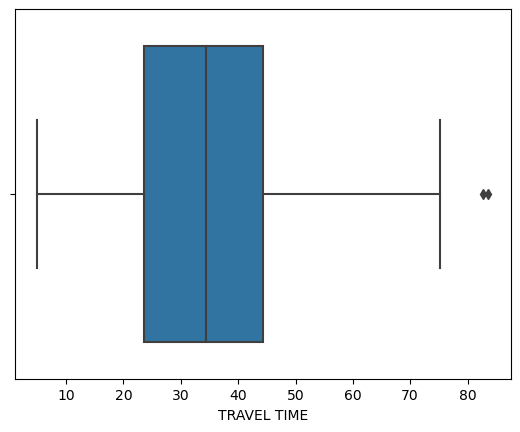

In [28]:
sns.boxplot(x="TRAVEL TIME",data=df)# this is not squential increasing the data, so no need to forward clipping

In [29]:
# to fill travel time use median as there are outliners
df['TRAVEL TIME'].fillna(df['TRAVEL TIME'].median(),inplace=True)

In [30]:
df.isnull().sum() #  filled travel time

INDEX              0
INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME        0
USE               53
MILES CLOCKED     25
CAR TYPE           0
CAR AGE           20
CITY               0
POSTAL CODE        0
dtype: int64

## Filling the EDUCATION missing values

In [31]:
# Now to fill education, it has strong relationship with job
df["JOB"].unique()

array(['Blue Collar', nan, 'Clerical', 'Lawyer', 'Home Maker', 'Manager',
       'Professional', 'Student', 'Doctor'], dtype=object)

In [32]:
 # first fill lwayer
df[df['JOB']=='Lawyer']

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
13,14,63952.17766,Yes,F,Masters,Lawyer,49.576895,Private,32340.0,Van,13.0,Texas,42420.0
35,36,49848.95817,No,F,Masters,Lawyer,35.020971,Private,13130.0,SUV,20.0,Los Angeles,90049.0
46,47,111268.31170,NaN,F,NaN,Lawyer,34.426446,Private,24600.0,Van,10.0,New Albany,47150.0
55,56,61521.48327,Yes,F,Masters,Lawyer,40.501002,Commercial,7650.0,Sports Car,9.0,New Albany,47150.0
56,57,105554.35370,No,M,Masters,Lawyer,75.242975,NaN,5300.0,Minivan,20.0,New Albany,47150.0
85,72,NaN,Yes,M,Masters,Lawyer,55.319377,Private,6960.0,SUV,14.0,New York City,12180.0
102,89,NaN,NaN,F,Masters,Lawyer,13.143433,Private,18850.0,Minivan,11.0,San Francisco,55106.0
134,121,NaN,NaN,F,Masters,Lawyer,51.405031,Private,12880.0,Minivan,NaN,Houston,61701.0
153,140,63889.85805,Yes,F,Masters,Lawyer,34.426446,Private,9100.0,Sports Car,6.0,Houston,61701.0


In [33]:
# by observing most lawyers has masters education
df.loc[df["JOB"]=="Lawyer","EDUCATION"]=df.loc[df["JOB"]=="Lawyer","EDUCATION"].fillna("Masters")

In [34]:
df.isnull().sum() # 4 NAN values are filled, like that fill remaining based on other job wise

INDEX              0
INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION         40
JOB               46
TRAVEL TIME        0
USE               53
MILES CLOCKED     25
CAR TYPE           0
CAR AGE           20
CITY               0
POSTAL CODE        0
dtype: int64

In [35]:
df["JOB"].unique()

array(['Blue Collar', nan, 'Clerical', 'Lawyer', 'Home Maker', 'Manager',
       'Professional', 'Student', 'Doctor'], dtype=object)

In [36]:
df[df['JOB']=='Home Maker']

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
5,6,NaN,NaN,F,High School,Home Maker,48.360191,NaN,6000.0,SUV,5.0,Texas,42420.0
12,13,16352.029310,Yes,F,NaN,Home Maker,34.426446,Private,10520.0,SUV,1.0,Texas,42420.0
15,16,20821.846300,Yes,F,High School,Home Maker,45.907713,Private,6880.0,SUV,1.0,Texas,42420.0
23,24,0.000000,Yes,F,High School,Home Maker,24.520001,Private,11740.0,SUV,1.0,Texas,42420.0
40,41,0.000000,No,M,High School,Home Maker,36.220252,NaN,16510.0,Minivan,1.0,Los Angeles,90049.0
48,49,25288.542630,Yes,F,NaN,Home Maker,30.843445,Private,13850.0,SUV,7.0,New Albany,47150.0
59,60,2656.766602,Yes,F,NaN,Home Maker,63.342544,NaN,10480.0,Sports Car,11.0,New Albany,47150.0
94,81,0.000000,No,F,High School,Home Maker,40.956033,Private,14240.0,SUV,1.0,New York City,12180.0
95,82,0.000000,Yes,F,NaN,Home Maker,10.700788,Private,8560.0,Sports Car,14.0,New York City,12180.0
125,112,0.000000,Yes,F,NaN,Home Maker,12.025304,NaN,6500.0,Sports Car,NaN,Houston,61701.0


In [37]:
df.loc[df["JOB"]=="Home Maker","EDUCATION"]=df.loc[df["JOB"]=="Home Maker","EDUCATION"].fillna("High School")

In [38]:
df["JOB"].unique()

array(['Blue Collar', nan, 'Clerical', 'Lawyer', 'Home Maker', 'Manager',
       'Professional', 'Student', 'Doctor'], dtype=object)

In [39]:
df[df['JOB']=='Manager']

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
6,7,87460.05269,No,M,High School,Manager,45.000488,NaN,15420.0,Minivan,1.0,Texas,42420.0
17,18,137102.73420,NaN,F,NaN,Manager,28.800357,Private,19510.0,Sports Car,15.0,Texas,42420.0
42,43,84345.18012,Yes,F,Bachelors,Manager,35.824304,Private,NaN,SUV,5.0,Los Angeles,90049.0
50,51,61369.90360,No,M,Masters,Manager,6.448685,NaN,21770.0,Van,12.0,New Albany,47150.0
106,93,62426.39554,Yes,F,Bachelors,Manager,34.426446,Private,11440.0,SUV,NaN,San Francisco,55106.0
116,103,NaN,Yes,F,NaN,Manager,19.370718,Private,14360.0,SUV,11.0,San Francisco,55106.0
149,136,37991.26687,No,F,High School,Manager,34.426446,Private,14000.0,Sports Car,1.0,Houston,61701.0
165,152,155409.65510,Yes,M,Bachelors,Manager,40.126603,Commercial,33330.0,Panel Truck,10.0,Seattle,78207.0
229,216,NaN,No,M,Masters,Manager,13.134732,Private,14780.0,SUV,12.0,Washington,11435.0
238,225,63694.71868,Yes,F,NaN,Manager,30.323492,Private,14170.0,SUV,12.0,Washington,11435.0


In [40]:
df.loc[df["JOB"]=="Manager","EDUCATION"]=df.loc[df["JOB"]=="Manager","EDUCATION"].fillna("Bachelors")

In [41]:
df[df['JOB']=='Manager']

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
6,7,87460.05269,No,M,High School,Manager,45.000488,NaN,15420.0,Minivan,1.0,Texas,42420.0
17,18,137102.73420,NaN,F,Bachelors,Manager,28.800357,Private,19510.0,Sports Car,15.0,Texas,42420.0
42,43,84345.18012,Yes,F,Bachelors,Manager,35.824304,Private,NaN,SUV,5.0,Los Angeles,90049.0
50,51,61369.90360,No,M,Masters,Manager,6.448685,NaN,21770.0,Van,12.0,New Albany,47150.0
106,93,62426.39554,Yes,F,Bachelors,Manager,34.426446,Private,11440.0,SUV,NaN,San Francisco,55106.0
116,103,NaN,Yes,F,Bachelors,Manager,19.370718,Private,14360.0,SUV,11.0,San Francisco,55106.0
149,136,37991.26687,No,F,High School,Manager,34.426446,Private,14000.0,Sports Car,1.0,Houston,61701.0
165,152,155409.65510,Yes,M,Bachelors,Manager,40.126603,Commercial,33330.0,Panel Truck,10.0,Seattle,78207.0
229,216,NaN,No,M,Masters,Manager,13.134732,Private,14780.0,SUV,12.0,Washington,11435.0
238,225,63694.71868,Yes,F,Bachelors,Manager,30.323492,Private,14170.0,SUV,12.0,Washington,11435.0


In [42]:
x=len(str(df[df["JOB"]=="Manager"]['EDUCATION'].mode().values))
str(df[df["JOB"]=="Manager"]['EDUCATION'].mode().values)[2:x-2]

'Bachelors'

In [43]:
df[df['JOB']=='Student']

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
24,25,0.000000,NaN,M,High School,Student,13.662860,Commercial,15090.0,Minivan,5.0,Philadelphia,84057.0
25,26,NaN,Yes,F,Bachelors,Student,48.143336,Commercial,12850.0,SUV,6.0,Los Angeles,90049.0
36,37,12054.369670,Yes,F,High School,Student,28.066243,Commercial,15760.0,Pickup,1.0,Los Angeles,90049.0
66,67,0.000000,No,M,High School,Student,32.525872,Private,NaN,Pickup,1.0,New York City,12180.0
88,75,4478.341531,No,F,High School,Student,7.472455,Private,6780.0,SUV,8.0,New York City,12180.0
96,83,10616.874230,Yes,M,High School,Student,13.749043,NaN,7960.0,Pickup,9.0,New York City,12180.0
103,90,0.000000,No,F,High School,Student,18.462764,NaN,1500.0,SUV,1.0,San Francisco,55106.0
111,98,NaN,Yes,F,NaN,Student,27.490724,NaN,22260.0,Pickup,4.0,San Francisco,55106.0
123,110,248.614532,No,F,High School,Student,30.168133,Private,10590.0,SUV,11.0,San Francisco,55106.0
140,127,0.000000,Yes,M,High School,Student,35.269037,Commercial,11610.0,Pickup,1.0,Houston,61701.0


In [44]:
x=len(str(df[df["JOB"]=="Student"]['EDUCATION'].mode().values))
df.loc[df["JOB"]=='Student',"EDUCATION"]=df.loc[df["JOB"]=='Student',"EDUCATION"].fillna(str(df[df["JOB"]=="Student"]['EDUCATION'].mode().values)[2:x-2])

In [45]:
df[df['JOB']=='Student']

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
24,25,0.000000,NaN,M,High School,Student,13.662860,Commercial,15090.0,Minivan,5.0,Philadelphia,84057.0
25,26,NaN,Yes,F,Bachelors,Student,48.143336,Commercial,12850.0,SUV,6.0,Los Angeles,90049.0
36,37,12054.369670,Yes,F,High School,Student,28.066243,Commercial,15760.0,Pickup,1.0,Los Angeles,90049.0
66,67,0.000000,No,M,High School,Student,32.525872,Private,NaN,Pickup,1.0,New York City,12180.0
88,75,4478.341531,No,F,High School,Student,7.472455,Private,6780.0,SUV,8.0,New York City,12180.0
96,83,10616.874230,Yes,M,High School,Student,13.749043,NaN,7960.0,Pickup,9.0,New York City,12180.0
103,90,0.000000,No,F,High School,Student,18.462764,NaN,1500.0,SUV,1.0,San Francisco,55106.0
111,98,NaN,Yes,F,High School,Student,27.490724,NaN,22260.0,Pickup,4.0,San Francisco,55106.0
123,110,248.614532,No,F,High School,Student,30.168133,Private,10590.0,SUV,11.0,San Francisco,55106.0
140,127,0.000000,Yes,M,High School,Student,35.269037,Commercial,11610.0,Pickup,1.0,Houston,61701.0


In [46]:
list1=['Blue Collar', 'Clerical','Professional', 'Doctor']
for i in list1:
    x=len(str(df[df["JOB"]==i]['EDUCATION'].mode().values))
    df.loc[df["JOB"]==i,"EDUCATION"]=df.loc[df["JOB"]==i,"EDUCATION"].fillna(str(df[df["JOB"]==i]['EDUCATION'].mode().values)[2:x-2])

In [47]:
df.isnull().sum()

INDEX              0
INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION          6
JOB               46
TRAVEL TIME        0
USE               53
MILES CLOCKED     25
CAR TYPE           0
CAR AGE           20
CITY               0
POSTAL CODE        0
dtype: int64

In [48]:
df[df["EDUCATION"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
45,46,NaN,Yes,F,NaN,NaN,34.426446,Private,1500.0,SUV,10.0,New Albany,47150.0
47,48,49703.42492,No,M,NaN,NaN,34.426446,Commercial,NaN,Panel Truck,20.0,New Albany,47150.0
87,74,NaN,No,F,NaN,NaN,15.624817,Private,22920.0,Sports Car,10.0,New York City,12180.0
117,104,64487.89350,Yes,M,NaN,NaN,37.468495,Commercial,21820.0,Van,7.0,San Francisco,55106.0
162,149,204372.95510,Yes,M,NaN,NaN,34.426446,Commercial,5100.0,Pickup,20.0,Houston,61701.0
164,151,39405.03083,Yes,M,NaN,NaN,28.490235,Commercial,10940.0,Pickup,14.0,Seattle,78207.0


In [49]:
# observed income is 0 & keep the conditions in () when using & use isna() not isnull()
df.loc[(df["SEX"]=="F" )& (df["EDUCATION"].isna()) & (df["JOB"].isna()),"JOB"]="Home Maker"
df.loc[(df["SEX"]=="F" )& (df["EDUCATION"].isna()) & (df["JOB"]=="Home Maker"),"EDUCATION"]="High School"

In [50]:
df[df["INCOME"].isnull()& df["EDUCATION"].isnull()][df["SEX"]=="F"]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


In [51]:
df[df["EDUCATION"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
47,48,49703.42492,No,M,NaN,NaN,34.426446,Commercial,NaN,Panel Truck,20.0,New Albany,47150.0
117,104,64487.89350,Yes,M,NaN,NaN,37.468495,Commercial,21820.0,Van,7.0,San Francisco,55106.0
162,149,204372.95510,Yes,M,NaN,NaN,34.426446,Commercial,5100.0,Pickup,20.0,Houston,61701.0
164,151,39405.03083,Yes,M,NaN,NaN,28.490235,Commercial,10940.0,Pickup,14.0,Seattle,78207.0


In [52]:
df.isnull().sum()

INDEX              0
INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION          4
JOB               44
TRAVEL TIME        0
USE               53
MILES CLOCKED     25
CAR TYPE           0
CAR AGE           20
CITY               0
POSTAL CODE        0
dtype: int64

In [53]:
df[df["JOB"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
1,2,50815.445310,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
4,5,130794.574200,No,M,High School,NaN,34.426446,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0
19,20,40656.448990,Yes,F,High School,NaN,57.091375,Private,9170.0,Sports Car,7.0,Texas,42420.0
32,33,110386.404400,Yes,M,Masters,NaN,21.159540,Commercial,16640.0,Van,14.0,Los Angeles,90049.0
34,35,0.000000,No,M,High School,NaN,46.932840,Commercial,5700.0,Pickup,1.0,Los Angeles,90049.0
47,48,49703.424920,No,M,NaN,NaN,34.426446,Commercial,NaN,Panel Truck,20.0,New Albany,47150.0
54,55,21281.934530,NaN,M,High School,NaN,39.710769,NaN,18150.0,Van,NaN,New Albany,47150.0
57,58,69290.213400,No,M,Masters,NaN,30.354284,NaN,NaN,Panel Truck,11.0,New Albany,47150.0
63,64,NaN,NaN,M,Masters,NaN,51.045426,Commercial,23250.0,Panel Truck,18.0,New York City,12180.0
67,68,109957.302300,Yes,F,Masters,NaN,49.818815,NaN,29470.0,Sports Car,18.0,New York City,12180.0


In [54]:
#df[(df["EDUCATION"]=="High School")&(df["JOB"].isnull())]

In [55]:
#df[df["EDUCATION"]=="High School"]["JOB"].mode()

In [56]:
#df.loc[df["EDUCATION"]=="High School","JOB"]=df.loc[df["EDUCATION"]=="High School","JOB"].fillna("Blue Collar")

In [57]:
#df[df["JOB"].isnull()]

In [58]:
df.isnull().sum()

INDEX              0
INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION          4
JOB               44
TRAVEL TIME        0
USE               53
MILES CLOCKED     25
CAR TYPE           0
CAR AGE           20
CITY               0
POSTAL CODE        0
dtype: int64

## Filling the SEX missing values

In [59]:
df[df["SEX"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
217,204,35096.80269,No,NaN,High School,Clerical,21.052160,Private,15690.0,Sports Car,1.0,Columbia,44123.0
240,227,12236.10714,No,NaN,High School,Home Maker,66.190768,Private,16320.0,SUV,8.0,Washington,11435.0
252,239,NaN,No,NaN,Masters,Lawyer,8.760570,Private,NaN,SUV,20.0,Washington,11435.0
289,276,NaN,Yes,NaN,Bachelors,Clerical,36.717450,Private,31960.0,Sports Car,7.0,Las Vegas,44412.0
294,281,114546.70950,No,NaN,Masters,NaN,28.827493,Commercial,23760.0,Panel Truck,8.0,Las Vegas,44412.0
297,284,0.00000,No,NaN,High School,Student,15.379303,Private,5800.0,Sports Car,6.0,Las Vegas,44412.0


In [60]:
df.loc[df["EDUCATION"].notna(),"SEX"]=df.loc[df["EDUCATION"].notna(),"SEX"].fillna("M")

In [61]:
df[df["SEX"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


In [62]:
df.isnull().sum()

INDEX              0
INCOME            43
MARITAL STATUS    28
SEX                0
EDUCATION          4
JOB               44
TRAVEL TIME        0
USE               53
MILES CLOCKED     25
CAR TYPE           0
CAR AGE           20
CITY               0
POSTAL CODE        0
dtype: int64

## Filling the MARITAL STATUS missing values

In [63]:
df[df["MARITAL STATUS"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
2,3,62977.824160,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
5,6,NaN,NaN,F,High School,Home Maker,48.360191,NaN,6000.0,SUV,5.0,Texas,42420.0
8,9,NaN,NaN,F,High School,Clerical,26.392961,NaN,10030.0,SUV,1.0,Texas,42420.0
17,18,137102.734200,NaN,F,Bachelors,Manager,28.800357,Private,19510.0,Sports Car,15.0,Texas,42420.0
24,25,0.000000,NaN,M,High School,Student,13.662860,Commercial,15090.0,Minivan,5.0,Philadelphia,84057.0
30,31,37579.711650,NaN,F,High School,Clerical,35.818130,Private,5260.0,SUV,1.0,Los Angeles,90049.0
33,34,76158.644990,NaN,F,Bachelors,Professional,52.423061,Private,19750.0,SUV,NaN,Los Angeles,90049.0
43,44,43173.633220,NaN,M,High School,Blue Collar,48.430555,Commercial,10020.0,Pickup,1.0,Los Angeles,90049.0
46,47,111268.311700,NaN,F,Masters,Lawyer,34.426446,Private,24600.0,Van,10.0,New Albany,47150.0
53,54,32317.314210,NaN,M,High School,Clerical,68.379629,NaN,22450.0,Minivan,1.0,New Albany,47150.0


In [64]:
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,4,77099.96624,No,F,Masters,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,34.426446,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0


In [65]:
df.loc[(df["EDUCATION"]=="High School")&(df["JOB"]=="Student"),"MARITAL STATUS"]=df.loc[(df["EDUCATION"]=="High School")&(df["JOB"]=="Student"),"MARITAL STATUS"].fillna("No")

In [66]:
df[df["MARITAL STATUS"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
2,3,62977.824160,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
5,6,NaN,NaN,F,High School,Home Maker,48.360191,NaN,6000.0,SUV,5.0,Texas,42420.0
8,9,NaN,NaN,F,High School,Clerical,26.392961,NaN,10030.0,SUV,1.0,Texas,42420.0
17,18,137102.734200,NaN,F,Bachelors,Manager,28.800357,Private,19510.0,Sports Car,15.0,Texas,42420.0
30,31,37579.711650,NaN,F,High School,Clerical,35.818130,Private,5260.0,SUV,1.0,Los Angeles,90049.0
33,34,76158.644990,NaN,F,Bachelors,Professional,52.423061,Private,19750.0,SUV,NaN,Los Angeles,90049.0
43,44,43173.633220,NaN,M,High School,Blue Collar,48.430555,Commercial,10020.0,Pickup,1.0,Los Angeles,90049.0
46,47,111268.311700,NaN,F,Masters,Lawyer,34.426446,Private,24600.0,Van,10.0,New Albany,47150.0
53,54,32317.314210,NaN,M,High School,Clerical,68.379629,NaN,22450.0,Minivan,1.0,New Albany,47150.0
54,55,21281.934530,NaN,M,High School,NaN,39.710769,NaN,18150.0,Van,NaN,New Albany,47150.0


In [67]:
df[["MARITAL STATUS","SEX","EDUCATION"]].value_counts()

MARITAL STATUS  SEX  EDUCATION  
No              M    High School    49
Yes             F    High School    49
No              F    High School    44
Yes             M    High School    25
No              F    Bachelors      16
                M    Bachelors      15
                     Masters        15
Yes             F    Bachelors      15
No              F    Masters        10
Yes             F    Masters         8
                M    Bachelors       6
No              F    PhD             3
Yes             M    Masters         3
No              M    PhD             1
Yes             F    PhD             1
dtype: int64

In [68]:
df["MARITAL STATUS"].value_counts()

No     154
Yes    110
Name: MARITAL STATUS, dtype: int64

In [69]:
# marital status is not depended on sex & education & not anything . so filling the values with no
df["MARITAL STATUS"].fillna("No",inplace=True)

In [70]:
df[df["MARITAL STATUS"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


In [71]:
df.isnull().sum()

INDEX              0
INCOME            43
MARITAL STATUS     0
SEX                0
EDUCATION          4
JOB               44
TRAVEL TIME        0
USE               53
MILES CLOCKED     25
CAR TYPE           0
CAR AGE           20
CITY               0
POSTAL CODE        0
dtype: int64

## Filling the CAR AGE missing values

In [72]:
df[df["CAR AGE"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
9,10,NaN,Yes,M,High School,Blue Collar,27.490749,NaN,NaN,Panel Truck,NaN,Texas,42420.0
11,12,NaN,No,F,High School,Blue Collar,61.603208,Commercial,9360.0,Sports Car,NaN,Texas,42420.0
33,34,76158.644990,No,F,Bachelors,Professional,52.423061,Private,19750.0,SUV,NaN,Los Angeles,90049.0
54,55,21281.934530,No,M,High School,NaN,39.710769,NaN,18150.0,Van,NaN,New Albany,47150.0
106,93,62426.395540,Yes,F,Bachelors,Manager,34.426446,Private,11440.0,SUV,NaN,San Francisco,55106.0
125,112,0.000000,Yes,F,High School,Home Maker,12.025304,NaN,6500.0,Sports Car,NaN,Houston,61701.0
134,121,NaN,No,F,Masters,Lawyer,51.405031,Private,12880.0,Minivan,NaN,Houston,61701.0
156,143,200771.924300,No,F,PhD,Doctor,34.426446,Private,9270.0,SUV,NaN,Houston,61701.0
157,144,108743.607600,No,M,Masters,NaN,34.426446,Commercial,5430.0,Pickup,NaN,Houston,61701.0
211,198,158.223551,No,M,High School,Student,33.489564,NaN,10510.0,Pickup,NaN,Columbia,44123.0


<Axes: xlabel='CAR AGE'>

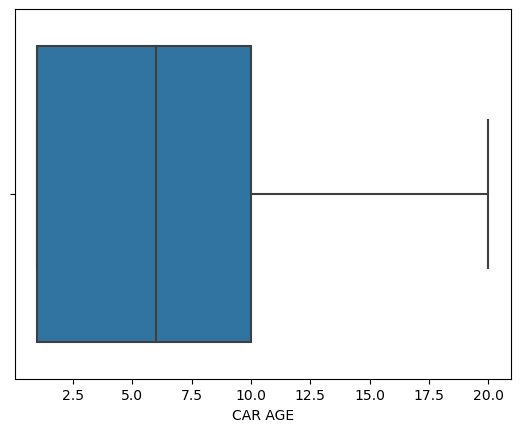

In [73]:
sns.boxplot(x="CAR AGE",data=df)

In [74]:
# there is no outliners, you can fill it with median
df['CAR AGE'].fillna(df['CAR AGE'].mean(),inplace=True)

In [75]:
df.isnull().sum()

INDEX              0
INCOME            43
MARITAL STATUS     0
SEX                0
EDUCATION          4
JOB               44
TRAVEL TIME        0
USE               53
MILES CLOCKED     25
CAR TYPE           0
CAR AGE            0
CITY               0
POSTAL CODE        0
dtype: int64

In [76]:
df.isnull().sum()

INDEX              0
INCOME            43
MARITAL STATUS     0
SEX                0
EDUCATION          4
JOB               44
TRAVEL TIME        0
USE               53
MILES CLOCKED     25
CAR TYPE           0
CAR AGE            0
CITY               0
POSTAL CODE        0
dtype: int64

## Filling the MILES CLOCKED missing values

In [77]:
df[df["MILES CLOCKED"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
2,3,62977.82416,No,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.000000,Texas,42420.0
9,10,NaN,Yes,M,High School,Blue Collar,27.490749,NaN,NaN,Panel Truck,6.330855,Texas,42420.0
10,11,16988.72135,No,M,High School,Blue Collar,20.450016,NaN,NaN,Pickup,6.000000,Texas,42420.0
16,17,NaN,No,F,High School,Blue Collar,42.500815,Private,NaN,SUV,4.000000,Texas,42420.0
27,28,31738.35627,Yes,M,High School,Blue Collar,23.286841,Commercial,NaN,SUV,1.000000,Los Angeles,90049.0
42,43,84345.18012,Yes,F,Bachelors,Manager,35.824304,Private,NaN,SUV,5.000000,Los Angeles,90049.0
47,48,49703.42492,No,M,NaN,NaN,34.426446,Commercial,NaN,Panel Truck,20.000000,New Albany,47150.0
57,58,69290.21340,No,M,Masters,NaN,30.354284,NaN,NaN,Panel Truck,11.000000,New Albany,47150.0
66,67,0.00000,No,M,High School,Student,32.525872,Private,NaN,Pickup,1.000000,New York City,12180.0
89,76,62036.46367,Yes,M,High School,Blue Collar,5.000000,Commercial,NaN,Van,1.000000,New York City,12180.0


<Axes: xlabel='CAR TYPE', ylabel='MILES CLOCKED'>

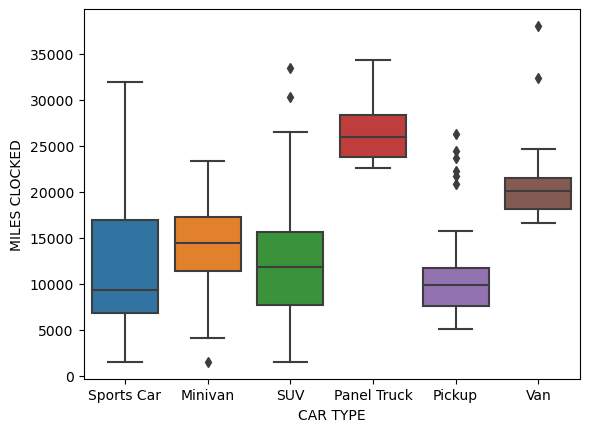

In [78]:
sns.boxplot(x="CAR TYPE",y="MILES CLOCKED",data=df)

<Axes: xlabel='CAR AGE', ylabel='MILES CLOCKED'>

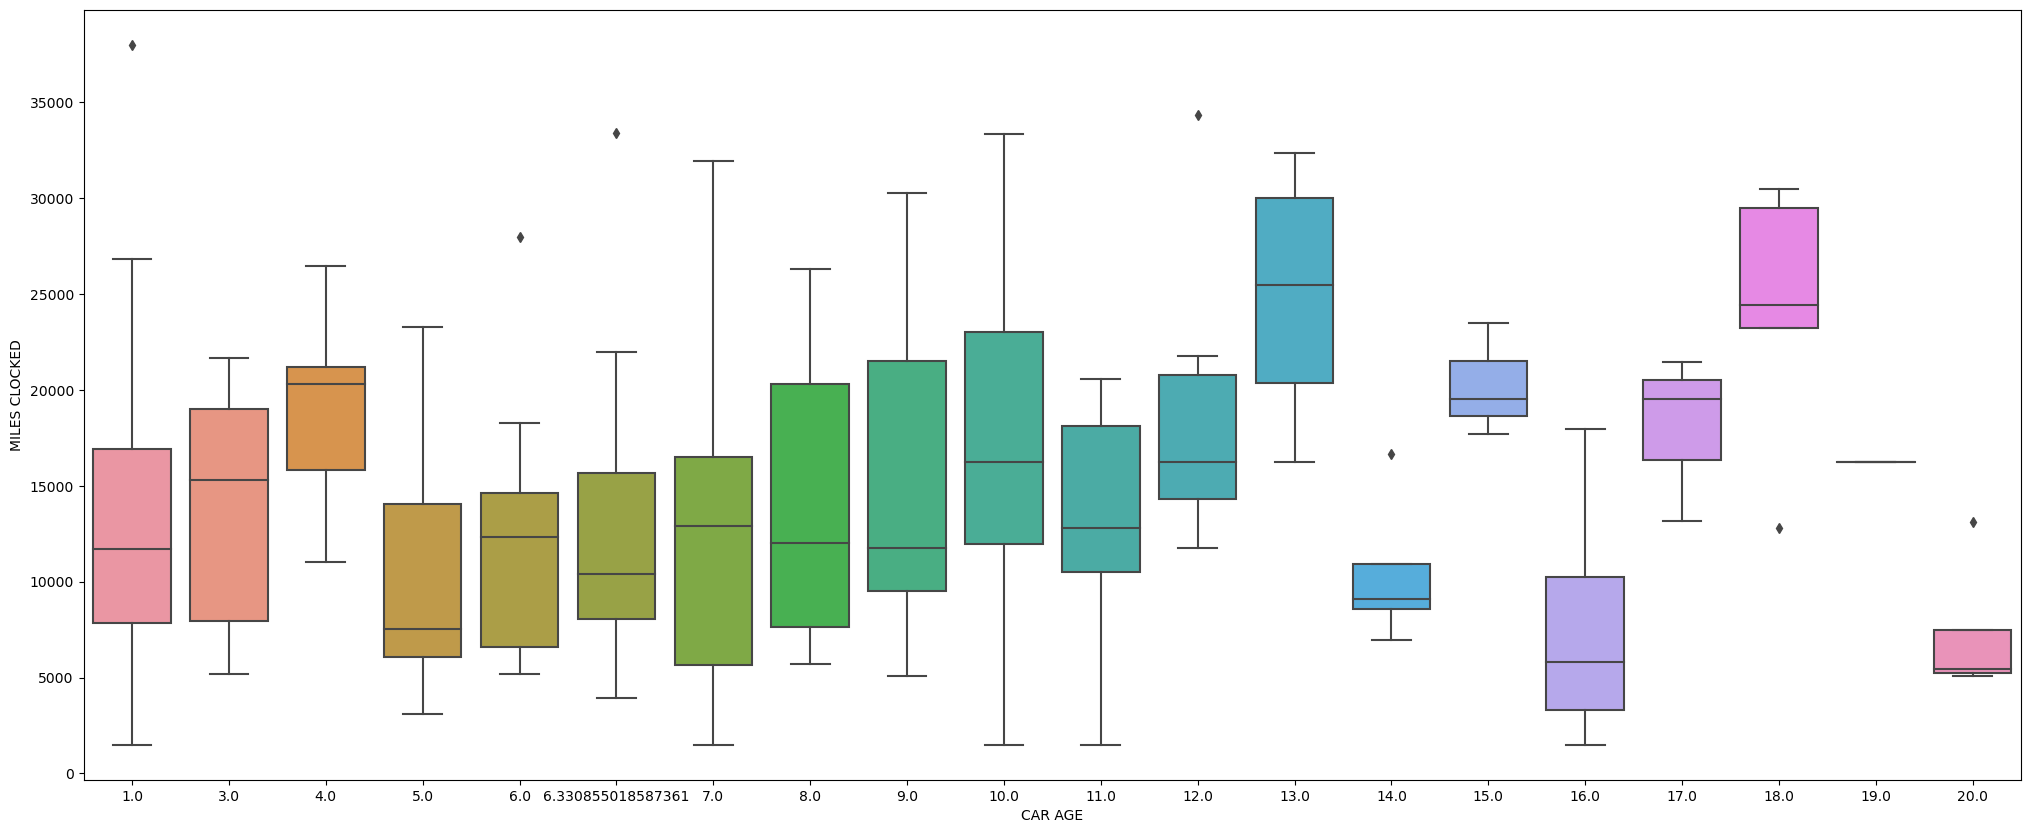

In [79]:
plt.figure(figsize=(25,10))
sns.boxplot(x="CAR AGE",y="MILES CLOCKED",data=df)

In [80]:
df.groupby('CAR TYPE')['MILES CLOCKED'].mean()

CAR TYPE
Minivan        13530.555556
Panel Truck    26687.647059
Pickup         11050.454545
SUV            12143.695652
Sports Car     11995.600000
Van            20958.400000
Name: MILES CLOCKED, dtype: float64

In [81]:
# Example: Average miles clocked by marital status
df.groupby('MARITAL STATUS')['MILES CLOCKED'].mean()


MARITAL STATUS
No     14438.819876
Yes    13041.941748
Name: MILES CLOCKED, dtype: float64

In [82]:
# Based on car type, I am going to fill it
#minivan , suv , pickup,van has outliners, so fill them with median
df.loc[df["CAR TYPE"]=="Minivan","MILES CLOCKED"]=df.loc[df["CAR TYPE"]=="Minivan","MILES CLOCKED"].fillna(df.loc[df["CAR TYPE"]=="Minivan"]["MILES CLOCKED"].median())

In [83]:
df[df["MILES CLOCKED"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
2,3,62977.82416,No,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.000000,Texas,42420.0
9,10,NaN,Yes,M,High School,Blue Collar,27.490749,NaN,NaN,Panel Truck,6.330855,Texas,42420.0
10,11,16988.72135,No,M,High School,Blue Collar,20.450016,NaN,NaN,Pickup,6.000000,Texas,42420.0
16,17,NaN,No,F,High School,Blue Collar,42.500815,Private,NaN,SUV,4.000000,Texas,42420.0
27,28,31738.35627,Yes,M,High School,Blue Collar,23.286841,Commercial,NaN,SUV,1.000000,Los Angeles,90049.0
42,43,84345.18012,Yes,F,Bachelors,Manager,35.824304,Private,NaN,SUV,5.000000,Los Angeles,90049.0
47,48,49703.42492,No,M,NaN,NaN,34.426446,Commercial,NaN,Panel Truck,20.000000,New Albany,47150.0
57,58,69290.21340,No,M,Masters,NaN,30.354284,NaN,NaN,Panel Truck,11.000000,New Albany,47150.0
66,67,0.00000,No,M,High School,Student,32.525872,Private,NaN,Pickup,1.000000,New York City,12180.0
89,76,62036.46367,Yes,M,High School,Blue Collar,5.000000,Commercial,NaN,Van,1.000000,New York City,12180.0


In [84]:
# minivan gets filled
df["CAR TYPE"].value_counts()

SUV            103
Sports Car      51
Pickup          47
Minivan         38
Van             27
Panel Truck     23
Name: CAR TYPE, dtype: int64

In [85]:
df.loc[df["CAR TYPE"]=="SUV","MILES CLOCKED"]=df.loc[df["CAR TYPE"]=="SUV","MILES CLOCKED"].fillna(df.loc[df["CAR TYPE"]=="SUV"]["MILES CLOCKED"].median())
df.loc[df["CAR TYPE"]=="Pickup","MILES CLOCKED"]=df.loc[df["CAR TYPE"]=="Pickup","MILES CLOCKED"].fillna(df.loc[df["CAR TYPE"]=="Pickup"]["MILES CLOCKED"].median())
df.loc[df["CAR TYPE"]=="Van","MILES CLOCKED"]=df.loc[df["CAR TYPE"]=="Van","MILES CLOCKED"].fillna(df.loc[df["CAR TYPE"]=="Van"]["MILES CLOCKED"].median())
df.loc[df["CAR TYPE"]=="Sports Car","MILES CLOCKED"]=df.loc[df["CAR TYPE"]=="Sports Car","MILES CLOCKED"].fillna(df.loc[df["CAR TYPE"]=="Sports Car"]["MILES CLOCKED"].mean())
df.loc[df["CAR TYPE"]=="Panel Truck","MILES CLOCKED"]=df.loc[df["CAR TYPE"]=="Panel Truck","MILES CLOCKED"].fillna(df.loc[df["CAR TYPE"]=="Panel Truck"]["MILES CLOCKED"].mean())

In [86]:
df[df["MILES CLOCKED"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


In [87]:
df.isnull().sum()

INDEX              0
INCOME            43
MARITAL STATUS     0
SEX                0
EDUCATION          4
JOB               44
TRAVEL TIME        0
USE               53
MILES CLOCKED      0
CAR TYPE           0
CAR AGE            0
CITY               0
POSTAL CODE        0
dtype: int64

## Filling the USE missing values

In [88]:
df[df["USE"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
3,4,77099.966240,No,F,Masters,Lawyer,15.415676,NaN,18300.000000,Sports Car,11.000000,Texas,42420.0
5,6,NaN,No,F,High School,Home Maker,48.360191,NaN,6000.000000,SUV,5.000000,Texas,42420.0
6,7,87460.052690,No,M,High School,Manager,45.000488,NaN,15420.000000,Minivan,1.000000,Texas,42420.0
7,8,NaN,Yes,F,High School,Blue Collar,15.665947,NaN,11290.000000,Sports Car,1.000000,Texas,42420.0
8,9,NaN,No,F,High School,Clerical,26.392961,NaN,10030.000000,SUV,1.000000,Texas,42420.0
9,10,NaN,Yes,M,High School,Blue Collar,27.490749,NaN,26687.647059,Panel Truck,6.330855,Texas,42420.0
10,11,16988.721350,No,M,High School,Blue Collar,20.450016,NaN,9850.000000,Pickup,6.000000,Texas,42420.0
18,19,102393.179900,No,M,Bachelors,Professional,24.867970,NaN,1500.000000,Minivan,11.000000,Texas,42420.0
29,30,53244.412830,No,M,Bachelors,Professional,27.551402,NaN,20920.000000,Van,8.000000,Los Angeles,90049.0
40,41,0.000000,No,M,High School,Home Maker,36.220252,NaN,16510.000000,Minivan,1.000000,Los Angeles,90049.0


In [89]:
df["USE"].value_counts()

Private       133
Commercial    103
Name: USE, dtype: int64

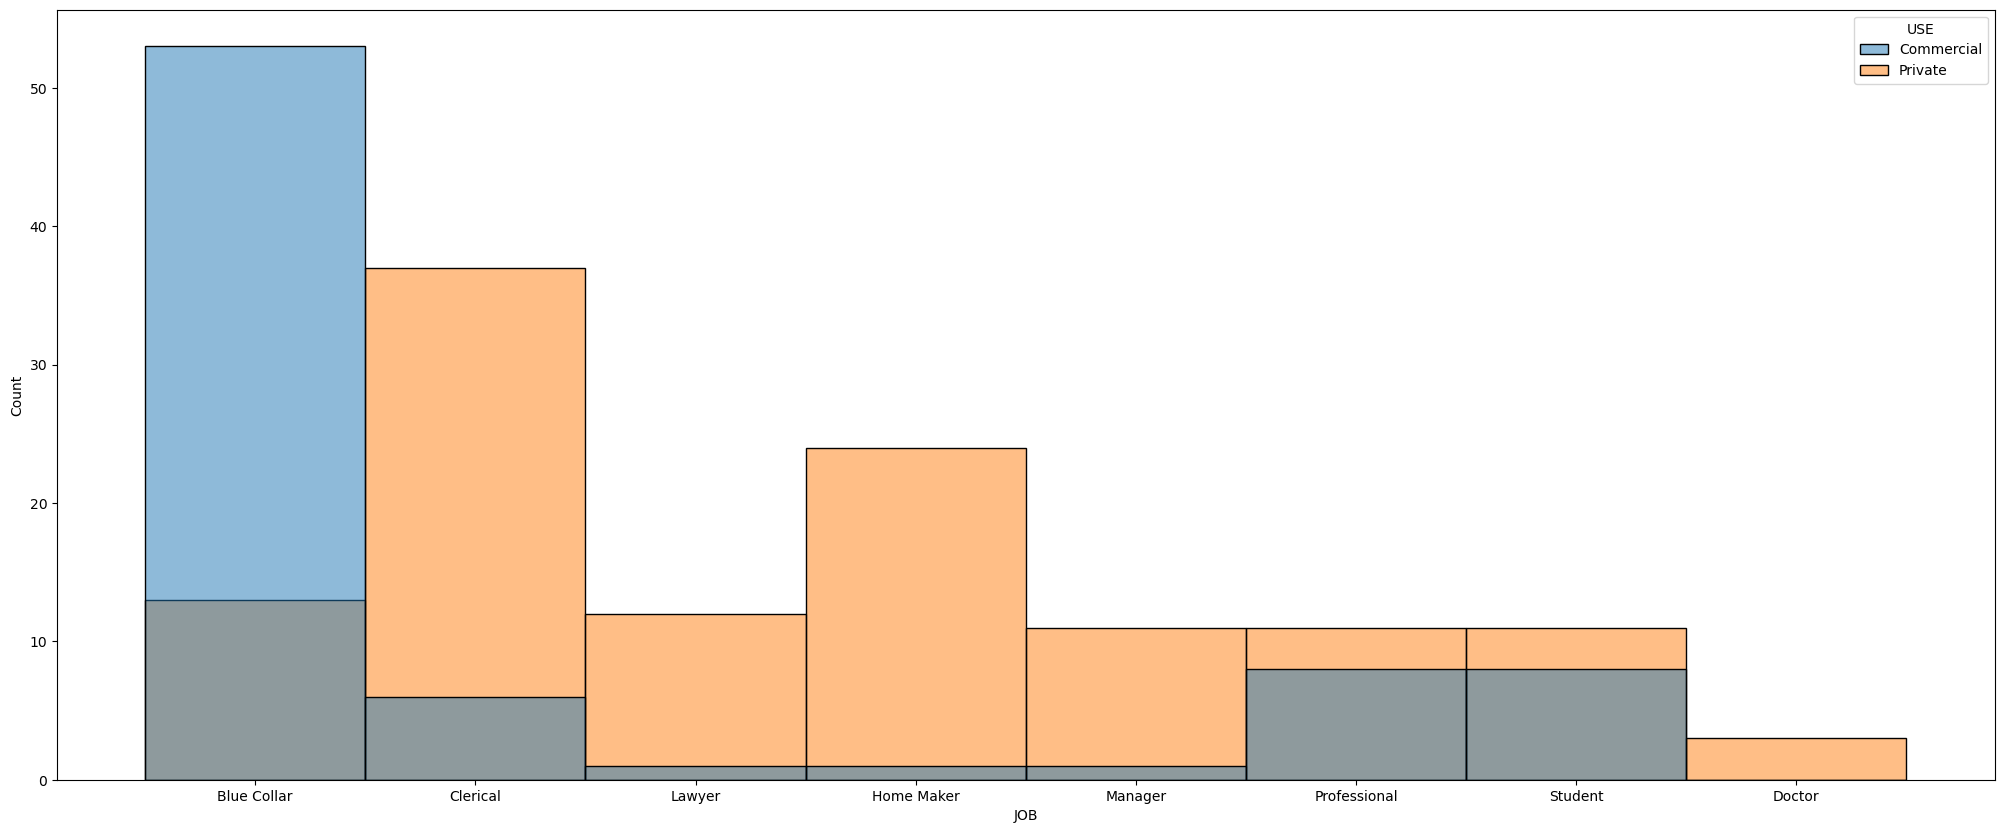

In [90]:
# Use may be commercial or private
plt.figure(figsize=(25,10))
sns.histplot(x="JOB",data=df,hue="USE");

In [91]:
df[["JOB","USE"]].value_counts().sort_index()

JOB           USE       
Blue Collar   Commercial    53
              Private       13
Clerical      Commercial     6
              Private       37
Doctor        Private        3
Home Maker    Commercial     1
              Private       24
Lawyer        Commercial     1
              Private       12
Manager       Commercial     1
              Private       11
Professional  Commercial     8
              Private       11
Student       Commercial     8
              Private       11
dtype: int64

In [92]:
df.loc[df["JOB"]=="Blue Collar","USE"]=df.loc[df["JOB"]=="Blue Collar","USE"].fillna(df[df["JOB"]=="Blue Collar"]["USE"].mode()[0])

In [93]:
df[["JOB","USE"]].value_counts().sort_index()

JOB           USE       
Blue Collar   Commercial    69
              Private       13
Clerical      Commercial     6
              Private       37
Doctor        Private        3
Home Maker    Commercial     1
              Private       24
Lawyer        Commercial     1
              Private       12
Manager       Commercial     1
              Private       11
Professional  Commercial     8
              Private       11
Student       Commercial     8
              Private       11
dtype: int64

In [94]:
print(df["JOB"].unique())
# remove nan to remove error
for i in ['Blue Collar','Clerical','Lawyer','Home Maker','Manager','Professional','Student','Doctor']:
     print(df[df["JOB"]==i]["USE"].mode()[0])

['Blue Collar' nan 'Clerical' 'Lawyer' 'Home Maker' 'Manager'
 'Professional' 'Student' 'Doctor']
Commercial
Private
Private
Private
Private
Private
Private
Private


In [95]:
for i in ['Blue Collar','Clerical','Lawyer','Home Maker','Manager','Professional','Student','Doctor']:
    df.loc[df["JOB"]==i,"USE"]=df.loc[df["JOB"]==i,"USE"].fillna(df[df["JOB"]==i]["USE"].mode()[0])

In [96]:
df[df["USE"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
54,55,21281.93453,No,M,High School,NaN,39.710769,NaN,18150.000000,Van,6.330855,New Albany,47150.0
57,58,69290.21340,No,M,Masters,NaN,30.354284,NaN,26687.647059,Panel Truck,11.000000,New Albany,47150.0
67,68,109957.30230,Yes,F,Masters,NaN,49.818815,NaN,29470.000000,Sports Car,18.000000,New York City,12180.0
97,84,140765.75530,No,M,Masters,NaN,34.426446,NaN,29220.000000,Panel Truck,13.000000,New York City,12180.0
100,87,65702.14547,No,F,Masters,NaN,26.823630,NaN,15820.000000,SUV,1.000000,San Francisco,55106.0
121,108,NaN,No,M,Masters,NaN,28.174277,NaN,19530.000000,Van,17.000000,San Francisco,55106.0
166,153,94565.86351,No,F,Masters,NaN,34.426446,NaN,3900.000000,SUV,16.000000,Seattle,78207.0
250,237,61219.91962,No,M,High School,NaN,45.537906,NaN,11790.000000,SUV,1.000000,Washington,11435.0


In [97]:
df.isnull().sum()

INDEX              0
INCOME            43
MARITAL STATUS     0
SEX                0
EDUCATION          4
JOB               44
TRAVEL TIME        0
USE                8
MILES CLOCKED      0
CAR TYPE           0
CAR AGE            0
CITY               0
POSTAL CODE        0
dtype: int64

## Filling the INCOME missing values

<Axes: xlabel='INCOME', ylabel='Count'>

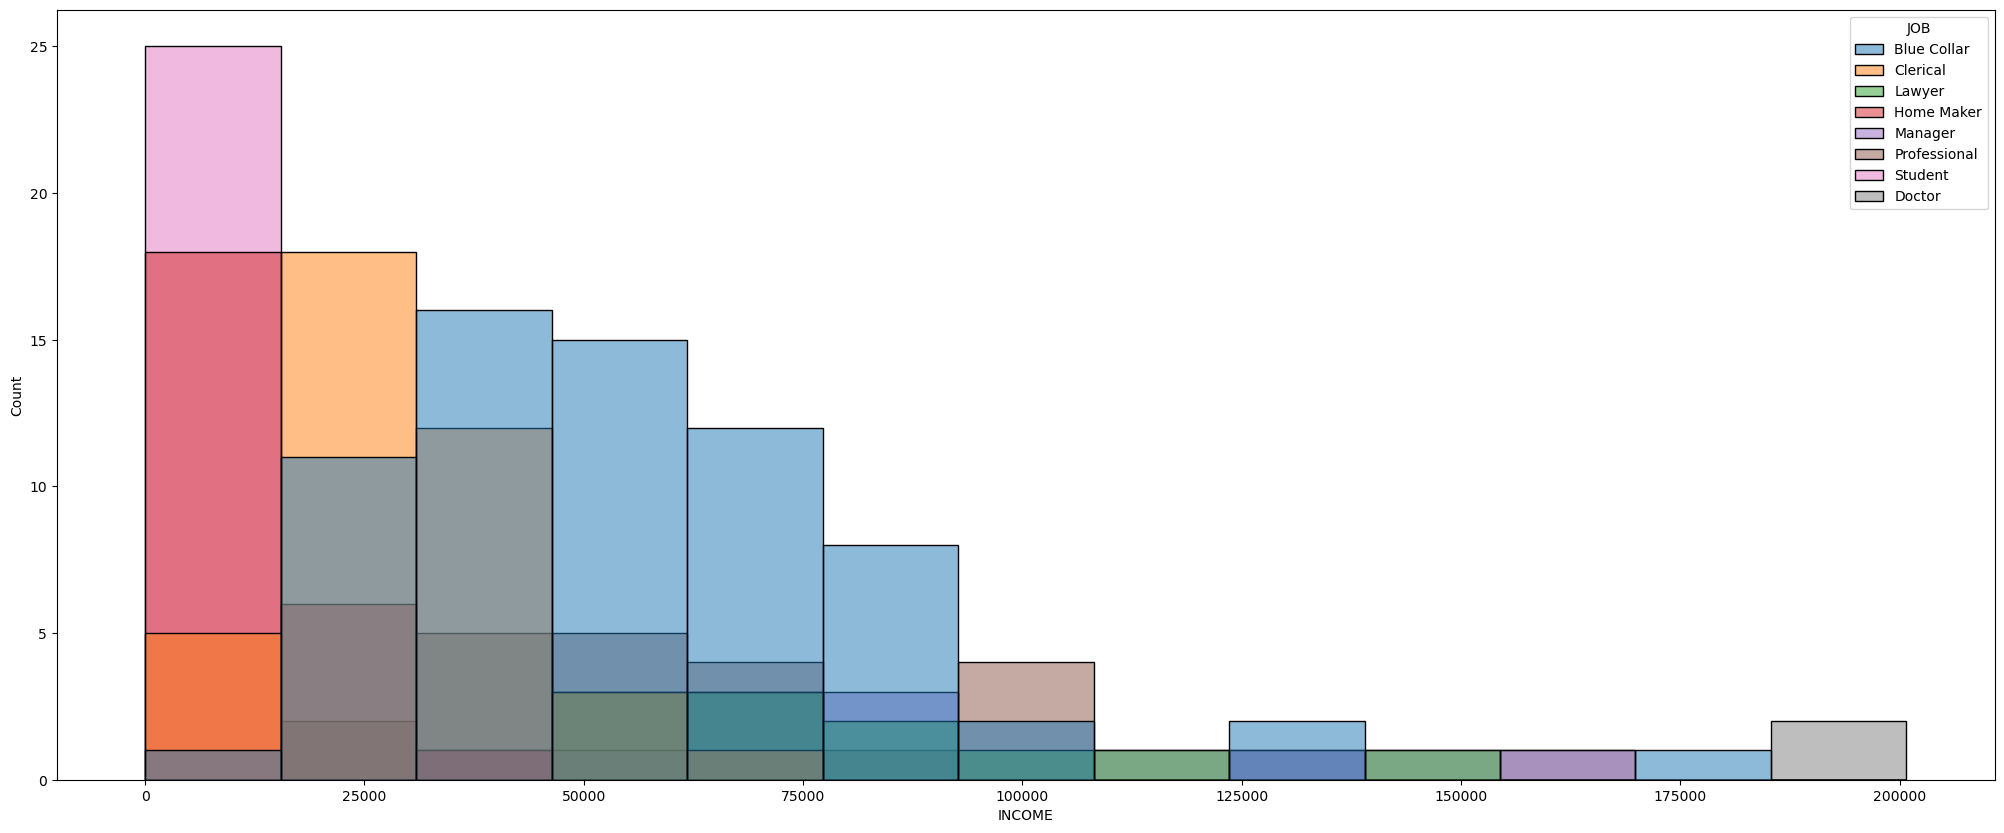

In [98]:
plt.figure(figsize=(25,10))
sns.histplot(x="INCOME",data=df,hue="JOB")

<Axes: xlabel='JOB', ylabel='INCOME'>

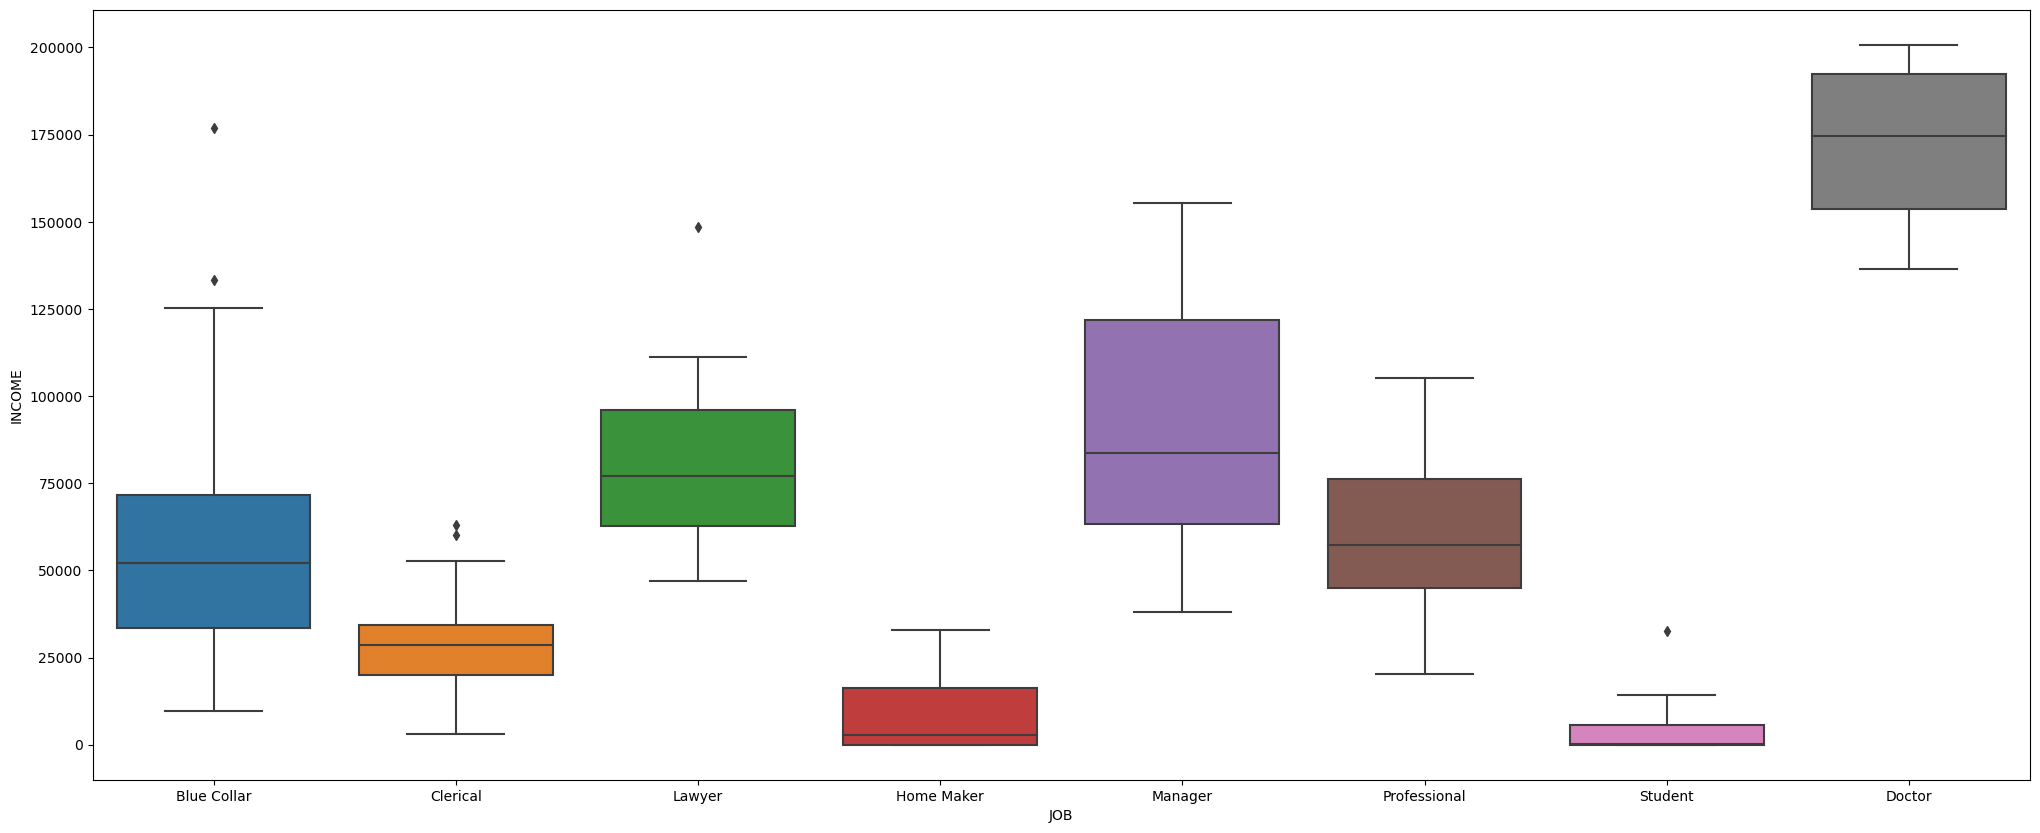

In [99]:
plt.figure(figsize=(25,10))
sns.boxplot(x="JOB",y="INCOME",data=df)

<Axes: xlabel='JOB', ylabel='INCOME'>

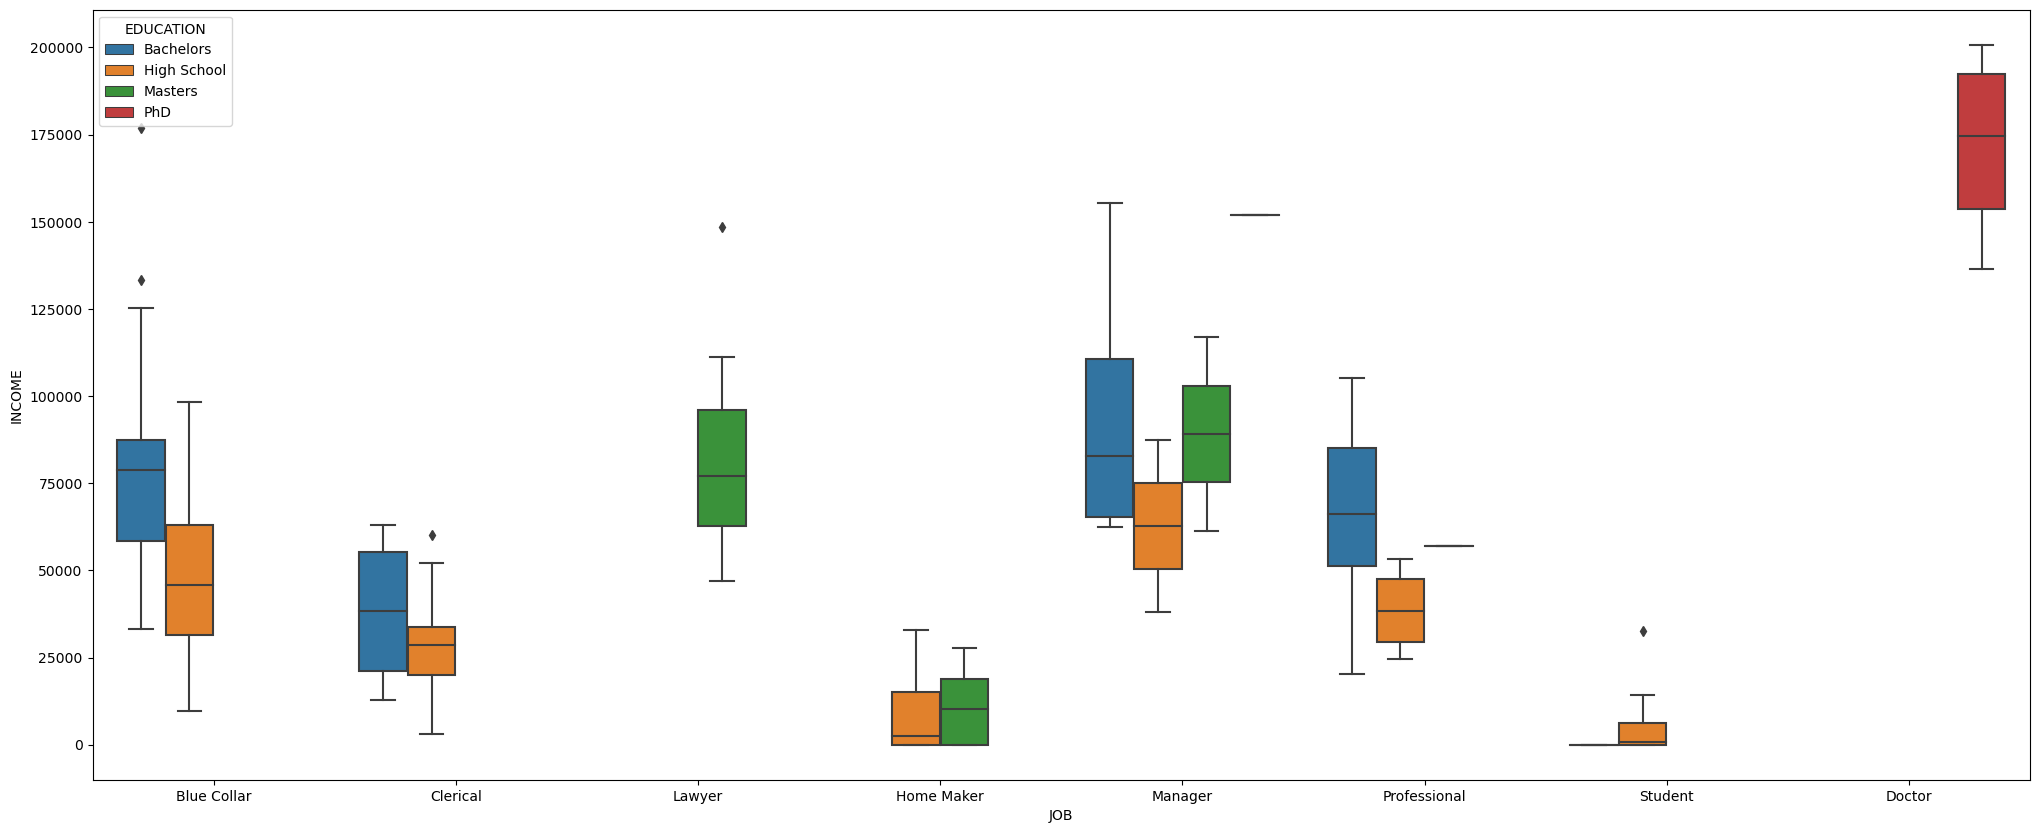

In [100]:
plt.figure(figsize=(25,10))
sns.boxplot(x="JOB",y="INCOME",data=df,hue="EDUCATION")

In [101]:
df["JOB"].unique()

array(['Blue Collar', nan, 'Clerical', 'Lawyer', 'Home Maker', 'Manager',
       'Professional', 'Student', 'Doctor'], dtype=object)

In [102]:
# home maker,manager,professional,doctor doesn't have outliners
df.loc[df["JOB"]=="Doctor","INCOME"]=df.loc[df["JOB"]=="Doctor","INCOME"].fillna(df[df["JOB"]=="Doctor"]["INCOME"].mean())

In [103]:
df["EDUCATION"].unique()

array(['Bachelors', 'High School', 'Masters', 'PhD', nan], dtype=object)

In [104]:
for i in ['Home Maker','Manager','Professional']:
    for j in ['Bachelors','High School','Masters','PhD']:
        df.loc[(df["JOB"]==i)&(df["EDUCATION"]==j),"INCOME"]=df.loc[(df["JOB"]==i)&(df["EDUCATION"]==j),"INCOME"].fillna(df[(df["JOB"]==i)&(df["EDUCATION"]==j)]["INCOME"].mean())

In [105]:
# remaining blue collar,clericallawyer,student has outliners so fill median
for i in ['Blue Collar','Clerical','Lawyer','Student']:
    for j in ['Bachelors','High School','Masters','PhD']:
        df.loc[(df["JOB"]==i)&(df["EDUCATION"]==j),"INCOME"]=df.loc[(df["JOB"]==i)&(df["EDUCATION"]==j),"INCOME"].fillna(df[(df["JOB"]==i)&(df["EDUCATION"]==j)]["INCOME"].median())

In [106]:
df[df["INCOME"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
63,64,NaN,No,M,Masters,NaN,51.045426,Commercial,23250.0,Panel Truck,18.0,New York City,12180.0
113,100,NaN,No,F,Masters,NaN,42.376470,Commercial,24410.0,Pickup,18.0,San Francisco,55106.0
121,108,NaN,No,M,Masters,NaN,28.174277,NaN,19530.0,Van,17.0,San Francisco,55106.0
206,193,NaN,No,F,PhD,Home Maker,34.426446,Private,17720.0,Minivan,15.0,Columbia,44123.0
301,288,NaN,Yes,F,High School,NaN,60.884292,Private,19550.0,Van,1.0,Las Vegas,44412.0


In [107]:
df[(df["JOB"]=='Home Maker')&(df["EDUCATION"]=='PhD')]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
206,193,NaN,No,F,PhD,Home Maker,34.426446,Private,17720.0,Minivan,15.0,Columbia,44123.0


<Axes: xlabel='INCOME'>

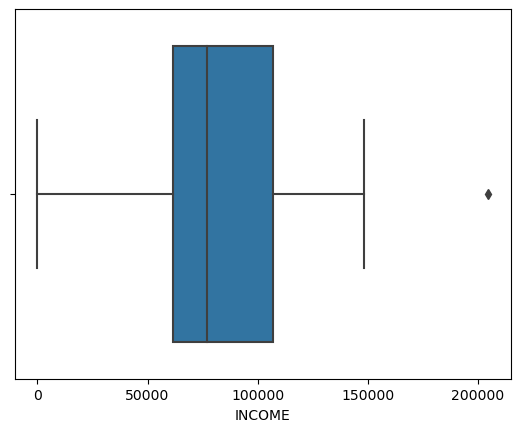

In [108]:
# as it is only one it's mean is zero
# find income as per masters 
sns.boxplot(x="INCOME",data=df[df["EDUCATION"]=="Masters"]) # outliner is there

In [109]:
df.loc[(df["EDUCATION"]=="Masters"),"INCOME"]=df.loc[(df["EDUCATION"]=="Masters"),"INCOME"].fillna(df[(df["EDUCATION"]=="Masters")]["INCOME"].median())
df.loc[(df["JOB"]=='Home Maker')&(df["EDUCATION"]=='PhD'),"INCOME"]=0 # as no history is there

In [110]:
df[df["INCOME"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
301,288,NaN,Yes,F,High School,NaN,60.884292,Private,19550.0,Van,1.0,Las Vegas,44412.0


<Axes: xlabel='EDUCATION', ylabel='INCOME'>

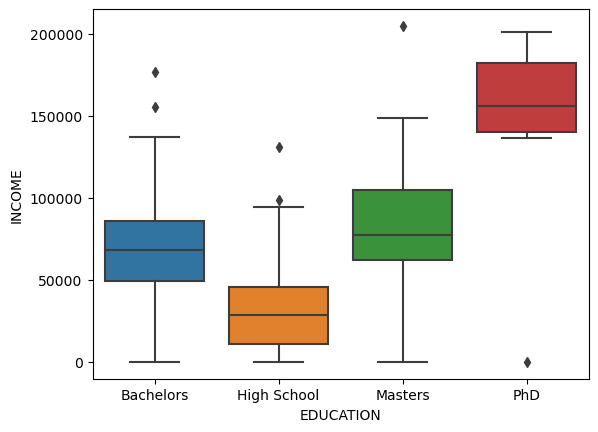

In [111]:
sns.boxplot(x="EDUCATION",y="INCOME",data=df)

In [112]:
df.loc[(df["JOB"].isnull())&(df["EDUCATION"]=="High School"),"INCOME"]=df.loc[(df["JOB"].isnull())&(df["EDUCATION"]=="High School"),"INCOME"].fillna(df[df["EDUCATION"]=="High School"]["INCOME"].median())

In [113]:
df[df["INCOME"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


In [114]:
df.isnull().sum()

INDEX              0
INCOME             0
MARITAL STATUS     0
SEX                0
EDUCATION          4
JOB               44
TRAVEL TIME        0
USE                8
MILES CLOCKED      0
CAR TYPE           0
CAR AGE            0
CITY               0
POSTAL CODE        0
dtype: int64

## Filling the remaining EDUCATION,JOB & USE missing values

In [115]:
# filled the income now fill the remaining education
df[df["EDUCATION"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
47,48,49703.42492,No,M,NaN,NaN,34.426446,Commercial,26687.647059,Panel Truck,20.0,New Albany,47150.0
117,104,64487.89350,Yes,M,NaN,NaN,37.468495,Commercial,21820.000000,Van,7.0,San Francisco,55106.0
162,149,204372.95510,Yes,M,NaN,NaN,34.426446,Commercial,5100.000000,Pickup,20.0,Houston,61701.0
164,151,39405.03083,Yes,M,NaN,NaN,28.490235,Commercial,10940.000000,Pickup,14.0,Seattle,78207.0


In [116]:
df.groupby("EDUCATION")["INCOME"].mean().sort_values()

EDUCATION
High School     30018.546931
Bachelors       69091.133010
Masters         80981.931486
PhD            139688.232983
Name: INCOME, dtype: float64

In [117]:
# fill the remaining job 
df[df["JOB"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
1,2,50815.445310,No,M,High School,NaN,20.591628,Private,18930.000000,Minivan,1.000000,Texas,42420.0
4,5,130794.574200,No,M,High School,NaN,34.426446,Commercial,28340.000000,Panel Truck,10.000000,Texas,42420.0
19,20,40656.448990,Yes,F,High School,NaN,57.091375,Private,9170.000000,Sports Car,7.000000,Texas,42420.0
32,33,110386.404400,Yes,M,Masters,NaN,21.159540,Commercial,16640.000000,Van,14.000000,Los Angeles,90049.0
34,35,0.000000,No,M,High School,NaN,46.932840,Commercial,5700.000000,Pickup,1.000000,Los Angeles,90049.0
47,48,49703.424920,No,M,NaN,NaN,34.426446,Commercial,26687.647059,Panel Truck,20.000000,New Albany,47150.0
54,55,21281.934530,No,M,High School,NaN,39.710769,NaN,18150.000000,Van,6.330855,New Albany,47150.0
57,58,69290.213400,No,M,Masters,NaN,30.354284,NaN,26687.647059,Panel Truck,11.000000,New Albany,47150.0
63,64,77099.966240,No,M,Masters,NaN,51.045426,Commercial,23250.000000,Panel Truck,18.000000,New York City,12180.0
67,68,109957.302300,Yes,F,Masters,NaN,49.818815,NaN,29470.000000,Sports Car,18.000000,New York City,12180.0


In [118]:
df.loc[(df["EDUCATION"].isnull())&(df["INCOME"]==49703.42492),"EDUCATION"]="High School"
df.loc[(df["EDUCATION"].isnull())&(df["INCOME"]==64487.89350),"EDUCATION"]="Bachelors"
df.loc[(df["EDUCATION"].isnull())&(df["INCOME"]==204372.95510),"EDUCATION"]="PhD"
df.loc[(df["EDUCATION"].isnull())&(df["INCOME"]==39405.03083),"EDUCATION"]="High School"
            

In [119]:
df.isnull().sum()

INDEX              0
INCOME             0
MARITAL STATUS     0
SEX                0
EDUCATION          0
JOB               44
TRAVEL TIME        0
USE                8
MILES CLOCKED      0
CAR TYPE           0
CAR AGE            0
CITY               0
POSTAL CODE        0
dtype: int64

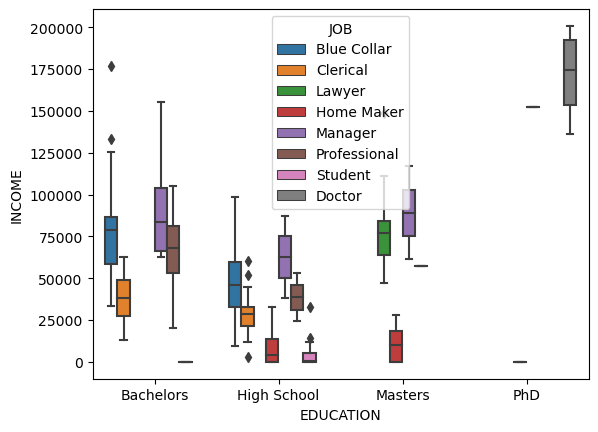

In [120]:
# based on income & education, job can be filled
sns.boxplot(x="EDUCATION",y="INCOME",data=df,hue="JOB"); # masters doesn't have outliners

In [121]:
df_new=df.groupby(["EDUCATION","JOB"])["INCOME"].mean().unstack()

In [123]:
df_new

JOB,Blue Collar,Clerical,Doctor,Home Maker,Lawyer,Manager,Professional,Student
EDUCATION,,,,,,,,
Bachelors,80088.959177,38203.481022,NaN,NaN,NaN,93225.907897,67832.017837,0.000000
High School,47442.262381,27925.948366,NaN,7968.239840,NaN,62725.659780,38703.416872,4209.524096
Masters,NaN,NaN,NaN,11365.958162,80316.726837,89119.702400,57062.788590,NaN
PhD,NaN,NaN,171517.398575,0.000000,NaN,152059.803600,NaN,NaN


In [124]:
#replace the values of bachelors & high School by median as they have outliners
for i in ["Bachelors","High School"]:
    for j in ["Blue Collar","Clerical","Doctor","Home Maker","Lawyer","Manager","Professional","Student"]:
        df_new.loc[i,j]=df[(df["EDUCATION"]==i)&(df["JOB"]==j)]["INCOME"].median()

In [125]:
df_new

JOB,Blue Collar,Clerical,Doctor,Home Maker,Lawyer,Manager,Professional,Student
EDUCATION,,,,,,,,
Bachelors,78866.44664,38342.98567,NaN,NaN,NaN,83553.51026,67832.017837,0.000000
High School,45827.67153,28591.85173,NaN,3864.526575,NaN,62725.65978,38703.416872,675.146418
Masters,NaN,NaN,NaN,11365.958162,80316.726837,89119.70240,57062.788590,NaN
PhD,NaN,NaN,171517.398575,0.000000,NaN,152059.80360,NaN,NaN


In [126]:
df[df["JOB"].isnull()].head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,34.426446,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0
19,20,40656.44899,Yes,F,High School,NaN,57.091375,Private,9170.0,Sports Car,7.0,Texas,42420.0
32,33,110386.40440,Yes,M,Masters,NaN,21.159540,Commercial,16640.0,Van,14.0,Los Angeles,90049.0
34,35,0.00000,No,M,High School,NaN,46.932840,Commercial,5700.0,Pickup,1.0,Los Angeles,90049.0


In [127]:


# Define a function to fill missing jobs based on income and education
def fill_job(row):
    education = row["EDUCATION"]
    income = row["INCOME"]
    
    # Filter df_new based on the education level
    if education in df_new.index:
        job_incomes = df_new.loc[education]
        closest_job = min(job_incomes.index, key=lambda x: abs(job_incomes[x] - income))
        return closest_job
    
    return np.nan

# Apply the fill_job function to the DataFrame where "JOB" is missing
df["JOB"] = df.apply(lambda row: fill_job(row) if pd.isna(row["JOB"]) else row["JOB"], axis=1)


In [128]:
df[df["JOB"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


In [129]:
# fill the remaining use
df[df["USE"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
54,55,21281.93453,No,M,High School,Clerical,39.710769,NaN,18150.000000,Van,6.330855,New Albany,47150.0
57,58,69290.21340,No,M,Masters,Blue Collar,30.354284,NaN,26687.647059,Panel Truck,11.000000,New Albany,47150.0
67,68,109957.30230,Yes,F,Masters,Blue Collar,49.818815,NaN,29470.000000,Sports Car,18.000000,New York City,12180.0
97,84,140765.75530,No,M,Masters,Blue Collar,34.426446,NaN,29220.000000,Panel Truck,13.000000,New York City,12180.0
100,87,65702.14547,No,F,Masters,Blue Collar,26.823630,NaN,15820.000000,SUV,1.000000,San Francisco,55106.0
121,108,77099.96624,No,M,Masters,Blue Collar,28.174277,NaN,19530.000000,Van,17.000000,San Francisco,55106.0
166,153,94565.86351,No,F,Masters,Blue Collar,34.426446,NaN,3900.000000,SUV,16.000000,Seattle,78207.0
250,237,61219.91962,No,M,High School,Manager,45.537906,NaN,11790.000000,SUV,1.000000,Washington,11435.0


In [130]:
df[(df["EDUCATION"]=="Masters")& (df["JOB"]=="Blue Collar")]["USE"].value_counts()

Commercial    12
Name: USE, dtype: int64

In [131]:
df["USE"].fillna("Commercial",inplace=True)

In [132]:
df[df["USE"].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


In [133]:
df.isnull().sum()

INDEX             0
INCOME            0
MARITAL STATUS    0
SEX               0
EDUCATION         0
JOB               0
TRAVEL TIME       0
USE               0
MILES CLOCKED     0
CAR TYPE          0
CAR AGE           0
CITY              0
POSTAL CODE       0
dtype: int64

## ALL MISSING VALUES are filled

In [134]:
df.to_excel("EDA_Finished_Cars.xlsx",index=False)

PermissionError: [Errno 13] Permission denied: 'EDA_Finished_Cars.xlsx'